In [668]:
 #importando bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

In [660]:
 #importando as datasets
train = pd.read_csv('train.csv')
test = pd.reae_csv('test.csv')

In [669]:
# Analisando a importância das features numéricas
numerical_cols = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]
# Remover Id & SalePrice 
numerical_cols.remove('Id')
numerical_cols.remove('SalePrice')
# Crianda dataset auxiliar para análise
num_analysis = train[numerical_cols].copy()

for col in numerical_cols:
    if num_analysis[col].isnull().sum() > 0:
        num_analysis[col] = SimpleImputer(strategy='median').fit_transform(num_analysis[col].values.reshape(-1,1))
        
# ModeloExtraTressRegressor
clf = ExtraTreesRegressor(random_state=42)
etreg_model = clf.fit(num_analysis, train.SalePrice)

C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


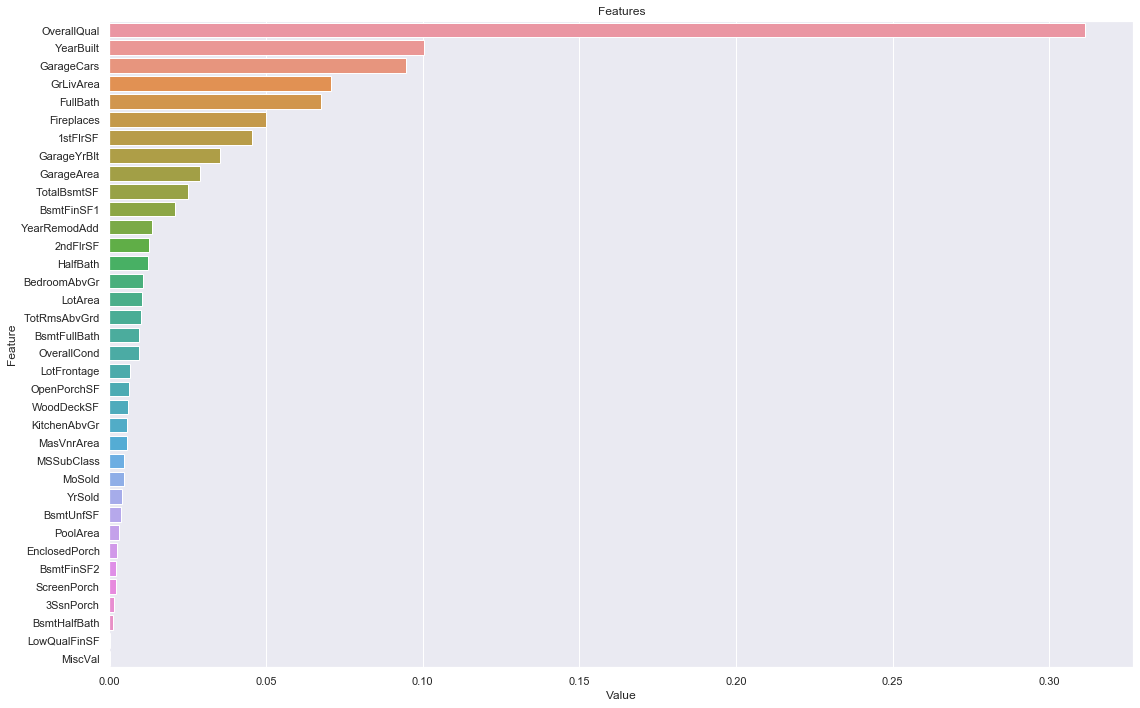

In [672]:
# Plotando a importancia das features numéricas
def plot_importance(model, features, num=len(numerical_cols), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features})
    plt.figure(figsize=(16, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(etreg_model, numerical_cols)

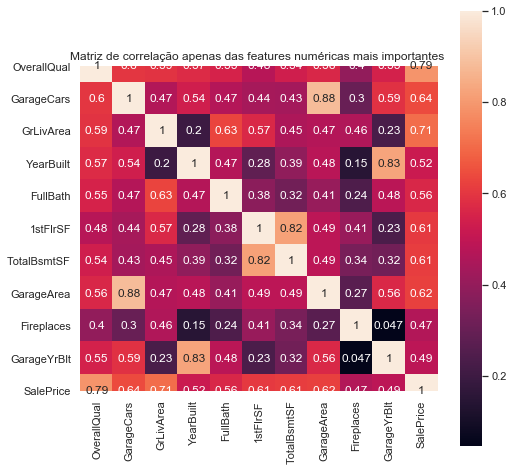

In [673]:
plt.figure(figsize=(8,8))
plt.title('Matriz de correlação apenas das features numéricas mais importantes ')
cols =['OverallQual', 'GarageCars', 'GrLivArea', 'YearBuilt', 
       'FullBath', '1stFlrSF', 'TotalBsmtSF', 'GarageArea','Fireplaces','GarageYrBlt','SalePrice']
sns.heatmap(train[cols].corr(),annot=True,square=True);

In [674]:
# Função para analisar indidualvente cada feature com SalePrice
def plot_numerical(col, discrete=False):
    if discrete:
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        sns.stripplot(x=col, y='SalePrice', data=train, ax=ax[0])
        sns.countplot(train[col], ax=ax[1])
        fig.suptitle(str(col) + ' analysis')
    else:
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        sns.scatterplot(x=col, y='SalePrice', data=train, ax=ax[0])
        sns.distplot(train[col], kde=False, ax=ax[1])
        fig.suptitle(str(col) + ' analysis')

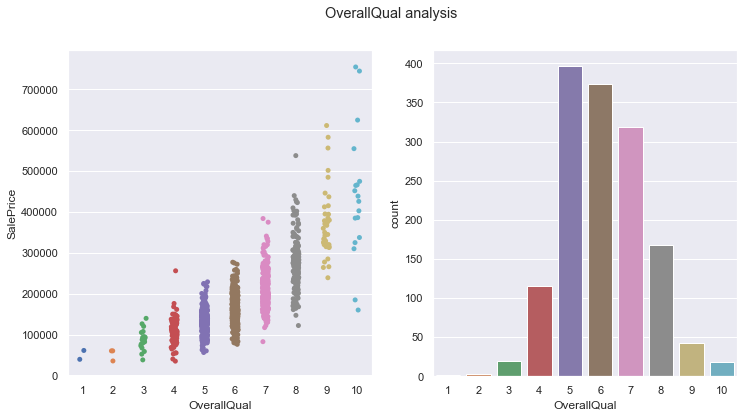

In [675]:
plot_numerical('OverallQual', discrete = True)

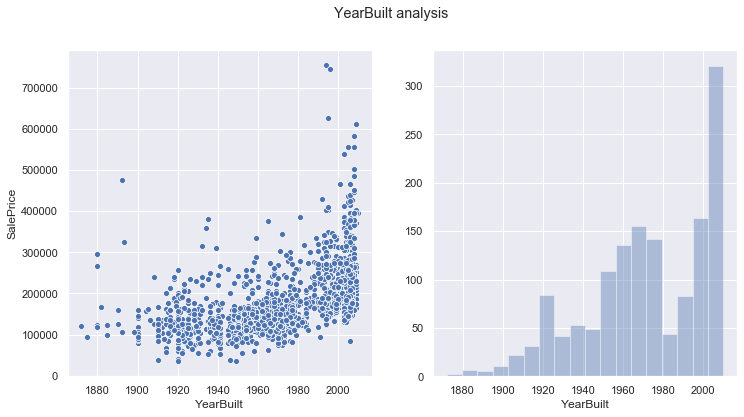

In [676]:
plot_numerical('YearBuilt');

In [679]:
# Analisando a importância das features categoricas 
categorical_features = [col for col in train.columns if train[col].dtype =='object']

cat_analysis = train[categorical_features].copy()

for col in cat_analysis:
    if cat_analysis[col].isnull().sum() > 0:
        cat_analysis[col] = SimpleImputer(strategy='constant').fit_transform(cat_analysis[col].values.reshape(-1,1))

# One-Hot Encoding
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
cat_analysis = one_hot_encoder(cat_analysis,categorical_features)

# Model 
clf = ExtraTreesRegressor(random_state=42)
h = clf.fit(cat_analysis, train.SalePrice)

C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


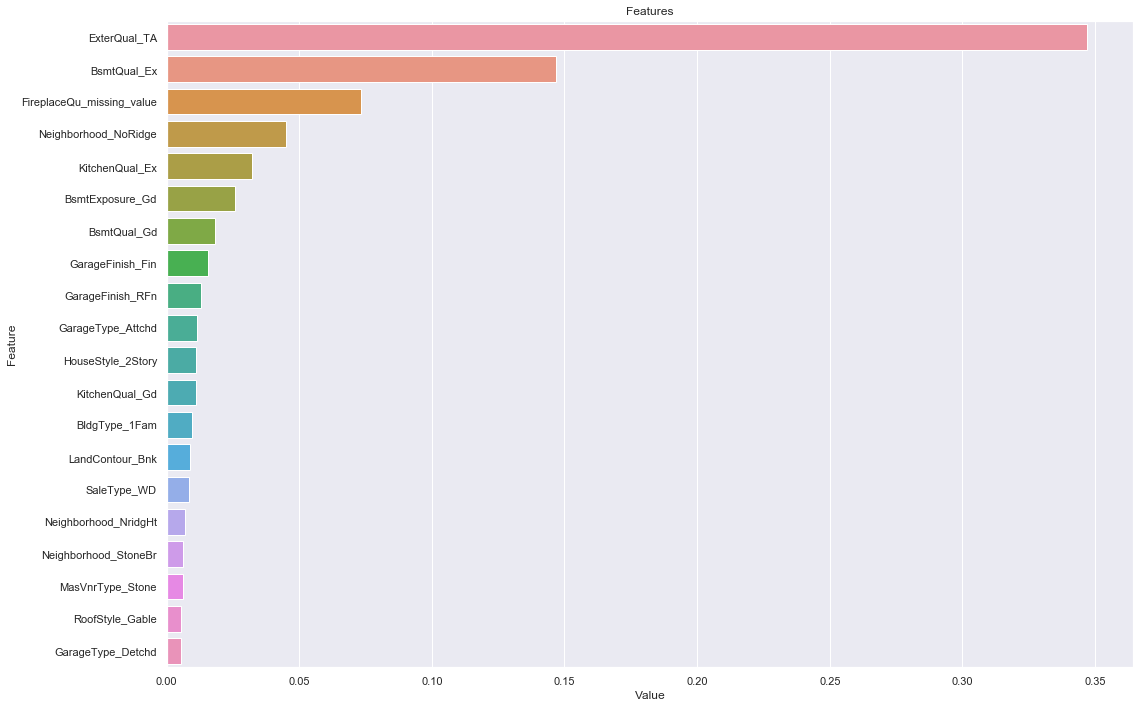

In [680]:
# Função para plotar a importância das features categoricas em relação ao target
def plot_importance(model, features, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(16, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:20])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(h, cat_analysis)

In [681]:
# Criando SalePrice na função cat_analysis
cat_analysis["SalePrice"] = train["SalePrice"]


In [682]:
# Função para analisar as features categoricas indivudualmente me relação ao SalePrice
def cat_plot(col1,col2):
    # tüm veri
    fig, ax = plt.subplots(1,2,figsize=(12,6), sharey=True)
    sns.stripplot(x=col1, y='SalePrice', data=train, ax=ax[0])
    sns.boxplot(x=col1, y='SalePrice', data=train, ax=ax[1])
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    fig.suptitle(str(col1) + ' analysis')
    
    # one-hot encoding
    fig, ax = plt.subplots(1,2,figsize=(12,6), sharey=True)
    sns.stripplot(x=col2, y='SalePrice', data=cat_analysis, ax=ax[0])
    sns.boxplot(x=col2, y='SalePrice', data=cat_analysis, ax=ax[1])
    fig.suptitle(str(col2) + ' analysis')

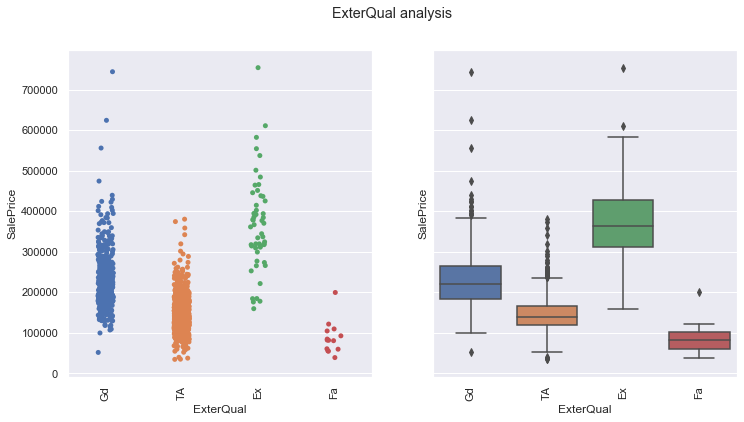

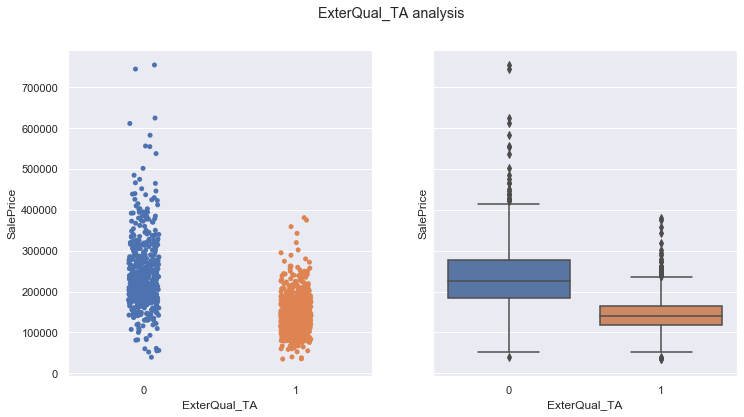

In [683]:
# Plotando as features categoricas mais importantes
cat_plot("ExterQual","ExterQual_TA")

In [685]:
# Criando dataset com train e test
data=pd.concat([train, test]).reset_index(drop=True)

C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [687]:
data.shape

(2919, 81)

In [689]:
# Tabela para visualizar a quantidade de dados faltando
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns
    
missing_values_table(data)

              n_miss  ratio
PoolQC          2909  99.66
MiscFeature     2814  96.40
Alley           2721  93.22
Fence           2348  80.44
SalePrice       1459  49.98
FireplaceQu     1420  48.65
LotFrontage      486  16.65
GarageQual       159   5.45
GarageCond       159   5.45
GarageFinish     159   5.45
GarageYrBlt      159   5.45
GarageType       157   5.38
BsmtExposure      82   2.81
BsmtCond          82   2.81
BsmtQual          81   2.77
BsmtFinType2      80   2.74
BsmtFinType1      79   2.71
MasVnrType        24   0.82
MasVnrArea        23   0.79
MSZoning           4   0.14
BsmtFullBath       2   0.07
BsmtHalfBath       2   0.07
Utilities          2   0.07
Functional         2   0.07
Electrical         1   0.03
BsmtUnfSF          1   0.03
Exterior1st        1   0.03
Exterior2nd        1   0.03
TotalBsmtSF        1   0.03
GarageCars         1   0.03
BsmtFinSF2         1   0.03
BsmtFinSF1         1   0.03
KitchenQual        1   0.03
SaleType           1   0.03
GarageArea         1

In [694]:
# NAN em algumas features = ausentes, alterándo para none. 
none_cols = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
             'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
             'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
#NAN em features númericas que indicam ausência substituir por 0
zero_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
             'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']
# Nos poucos que realmente faltam substituir pela moda
freq_cols = ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
             'SaleType', 'Utilities']

for col in zero_cols:
    data[col].replace(np.nan, 0, inplace=True)

for col in none_cols:
    data[col].replace(np.nan, 'None', inplace=True)
    
for col in freq_cols:
    data[col].replace(np.nan, data[col].mode()[0], inplace=True)

In [695]:
#Checando novamente o números de dados que faltam
missing_values_table(data)

             n_miss  ratio
SalePrice      1459  49.98
LotFrontage     486  16.65
MSZoning          4   0.14


In [696]:
#Como faltam apenas 4 dados de MSZoning, preencher com a moda
data['MSZoning'] = data.groupby('MSSubClass')['MSZoning'].apply(
    lambda x: x.fillna(x.mode()[0]))


In [697]:
#Para LotFrontage preencer com a média do tamanho de acordo com cada bairro
data['LotFrontage'] = data.groupby(
    ['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [698]:
#Verificando novamente a quantidade de dados faltando
missing_values_table(data)

           n_miss  ratio
SalePrice    1459  49.98


In [701]:
#Convertendo alguma features para o formato string
data['MSSubClass'] = data['MSSubClass'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      29

In [703]:
#ENGENHARIA DE RECURSOS
data.groupby("Neighborhood").agg({"SalePrice":"mean"}).sort_values(by="SalePrice", ascending=False)

SalePrice
Neighborhood               
NoRidge       335295.317073
NridgHt       316270.623377
StoneBr       310499.000000
Timber        242247.447368
Veenker       238772.727273
Somerst       225379.837209
ClearCr       212565.428571
Crawfor       210624.725490
CollgCr       197965.773333
Blmngtn       194870.882353
Gilbert       192854.506329
NWAmes        189050.068493
SawyerW       186555.796610
Mitchel       156270.122449
NAmes         145847.080000
NPkVill       142694.444444
SWISU         142591.360000
Blueste       137500.000000
Sawyer        136793.135135
OldTown       128225.300885
Edwards       128219.700000
BrkSide       124834.051724
BrDale        104493.750000
IDOTRR        100123.783784
MeadowV        98576.470588

In [704]:
#Combinamos distritos semelhantes entre si de acordo com a média do target
ext_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
data['ExterCond'] = data['ExterCond'].map(ext_map).astype('int')

bsm_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

data['BsmtCond'] = data['BsmtCond'].map(bsm_map).astype('int')

bsmf_map = {'None': 0,'Unf': 1,'LwQ': 2,'Rec': 3,'BLQ': 4,'ALQ': 5,'GLQ': 6}
data['BsmtFinType1'] = data['BsmtFinType1'].map(bsmf_map).astype('int')
data['BsmtFinType2'] = data['BsmtFinType2'].map(bsmf_map).astype('int')

heat_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
data['HeatingQC'] = data['HeatingQC'].map(heat_map).astype('int')

data['FireplaceQu'] = data['FireplaceQu'].map(bsm_map).astype('int')
data['GarageCond'] = data['GarageCond'].map(bsm_map).astype('int')
data['GarageQual'] = data['GarageQual'].map(bsm_map).astype('int')


In [705]:
#Tornando algumas features mais compreensíveis
data= data.replace({"MSSubClass": {20: "SC20", 30: "SC30", 40: "SC40", 45: "SC45", \
50: "SC50", 60: "SC60", 70: "SC70", 75: "SC75", \
80: "SC80", 85: "SC85", 90: "SC90", 120: "SC120", \
150: "SC150", 160: "SC160", 180: "SC180", 190: "SC190"},
"MoSold": {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", \
7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}})

In [706]:
#Analisando e modificando feature Functional
func = {"Sal": 0, "Sev": 1, "Maj2": 2, "Maj1": 3, "Mod": 4, "Min2": 5, "Min1": 6, "Typ": 7}
data["Functional"] = data["Functional"].map(func).astype("int")
data.groupby("Functional").agg({"SalePrice": "mean"})

SalePrice
Functional               
1           129000.000000
2            85800.000000
3           153948.142857
4           168393.333333
5           144240.647059
6           146385.483871
7           183429.147059

In [707]:
# Modificando LotShape
data.groupby("LotShape").agg({"SalePrice": "mean"}).sort_values(by="SalePrice", ascending=False)
shape_map = {"Reg": 1, "IR1": 2, "IR3": 3, "IR2": 4}
data['LotShape'] = data['LotShape'].map(shape_map).astype('int')

In [708]:
# ONE-HOT ENCONDER
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [713]:
##

In [714]:
#Transformando as variaveis categóricas em dummys 
data = one_hot_encoder(data, categorical_features, drop_first=True)
data.shape

(2919, 261)

In [718]:
#Modelando
train_data = data[data['SalePrice'].notnull()]
test_data = data[data['SalePrice'].isnull()].drop("SalePrice", axis=1)

In [737]:
y = train_data['SalePrice']
X = train_data.drop(["Id", "SalePrice"], axis=1)

In [728]:
conda install -c conda-forge catboost

^C

Note: you may need to restart the kernel to use updated packages.


In [731]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [733]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [734]:
#Modelos de ML

from catboost import CatBoostRegressor, CatBoostClassifier
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor




In [735]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

In [771]:
for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 3517318866.9358 (LR) 
RMSE: 32508.9565 (Ridge) 
RMSE: 41219.026 (Lasso) 
RMSE: 34834.9987 (ElasticNet) 
RMSE: 46937.9072 (KNN) 
RMSE: 41196.0045 (CART) 
RMSE: 30702.2802 (RF) 
RMSE: 81158.836 (SVR) 
RMSE: 26866.1602 (GBM) 


ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.MSSubClass, MoSold, YrSold

In [753]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(   X, y, test_size=0.3, random_state=123)

from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()

modelo.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [757]:
score = modelo.score(x_test,y_test)
score

In [759]:
X_train,X_test,y_train,y_test = train_test_split(   X, y, test_size=0.3, random_state=123)

In [763]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, X):
        return self.clf.predict(X)
    
    def fit(self,X,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,X,y):
        return self.clf.fit(X,y).feature_importances_
    
    def score(self,X,y):
        return self.clf.score(X,y)

In [764]:
modelos = [{'nome': 'logreg',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

In [765]:
resultado = []
for model in modelos:
    x= ModeloAuxiliar(clf=model['modelo']) 
    #treinar o modelo
    x.fit(X_train, y_train)
    #gerar predição
    x_pred = X.predict(X_test)
    #geral score
    acuracidade = round(X.score(X_test,y_test)*100,2)
    
    resultado.append({'nome': model['nome'],'score': acuracidade,'pred':x_pred})

C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: float() argument must be a string or a number, not 'ModeloAuxiliar'

In [768]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [770]:
reg= LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None)
train,test=reg.fit(X_train,X_test,y_train,y_test)
test

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [02:11<00:00,  3.46s/it]


R-Squared      RMSE  Time Taken
Model                                                         
GradientBoostingRegressor           0.88  25889.62        6.16
BaggingRegressor                    0.88  26478.74        1.73
XGBRegressor                        0.87  26838.37        5.21
HistGradientBoostingRegressor       0.87  27078.99       42.83
LGBMRegressor                       0.87  27208.82        4.72
RandomForestRegressor               0.87  27237.99        1.27
ExtraTreesRegressor                 0.86  28709.56        2.03
BayesianRidge                       0.84  29989.75        1.54
HuberRegressor                      0.84  29999.90        1.66
RidgeCV                             0.84  30028.99        0.31
LassoLars                           0.84  30106.38        0.54
Ridge                               0.84  30137.74        0.24
Lasso                               0.84  30162.77        0.74
LinearRegression                    0.84  30167.57        0.86
TransformedTargetRegressor          0.84  30167.57        2.02
KernelRidge                         0.84  30293.36        0.81
PassiveAggressiveRegressor          0.83  30779.45        3.14
SGDRegressor                        0.83  30840.94        0.26
Lars                                0.83  31140.93        1.18
LassoLarsCV                         0.83  31291.08        1.80
LassoLarsIC                         0.82  31690.29        0.58
ElasticNet                          0.82  31770.71        0.72
OrthogonalMatchingPursuit           0.81  33031.35        0.37
AdaBoostRegressor                   0.81  33298.09        2.58
OrthogonalMatchingPursuitCV         0.80  33720.60        0.70
LassoCV                             0.80  33788.85        0.99
DecisionTreeRegressor               0.77  36049.81        0.61
LarsCV                              0.77  36369.48        1.17
KNeighborsRegressor                 0.75  37746.65        1.46
RANSACRegressor                     0.75  38125.98        4.33
ExtraTreeRegressor                  0.70  41182.98        0.43
ElasticNetCV                        0.14  70132.06        2.37
DummyRegressor                     -0.00  75813.79        0.41
NuSVR                              -0.03  76839.13        1.46
SVR                                -0.09  79138.43        1.37
GaussianProcessRegressor           -4.68 180561.26        8.02
MLPRegressor                       -5.69 195878.34       23.59
LinearSVR                          -5.74 196666.84        0.54

In [773]:
data.head()

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0       856       854          0             3      706.00        0.00   
1      1262         0          0             3      978.00        0.00   
2       920       866          0             3      486.00        0.00   
3       961       756          0             3      216.00        0.00   
4      1145      1053          0             4      655.00        0.00   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  SaleType_ConLI  \
0          1.00          0.00     150.00              0  ...               0   
1          0.00          1.00     284.00              0  ...               0   
2          1.00          0.00     434.00              0  ...               0   
3          1.00          0.00     540.00            272  ...               0   
4          1.00          0.00     490.00              0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 261 columns]

In [89]:
modaNridgHt=data[['FrenteDoLote', 'Bairro']].loc[(data['Bairro']=='NridgHt')]['FrenteDoLote'].mode()[0]

In [90]:
data[['FrenteDoLote', 'Bairro']].loc[(data['Bairro']=='NridgHt')]['FrenteDoLote'].fillna(modaNridgHt, inplace=True)

In [92]:
modaNWAmes=data[['FrenteDoLote', 'Bairro']].loc[(data['Bairro']=='NWAmes')]['FrenteDoLote'].mode()[0]

In [93]:
data[['FrenteDoLote', 'Bairro']].loc[(data['Bairro']=='NWAmes')]['FrenteDoLote'].fillna(modaNWAmes, inplace=True)

In [95]:
modaOldTown=data[['FrenteDoLote', 'Bairro']].loc[(data['Bairro']=='OldTown')]['FrenteDoLote'].mode()[0]

In [96]:
data[['FrenteDoLote', 'Bairro']].loc[(data['Bairro']=='OldTown')]['FrenteDoLote'].fillna(modaOldTown, inplace=True)

In [100]:
modaSWISU=data[['FrenteDoLote', 'Bairro']].loc[(data['Bairro']=='SWISU')]['FrenteDoLote'].mode()[0]

In [101]:
data[['FrenteDoLote', 'Bairro']].loc[(data['Bairro']=='SWISU')]['FrenteDoLote'].fillna(modaSWISU, inplace=True)

In [104]:
data[['FrenteDoLote', 'Bairro']].loc[(data['Bairro']=='Sawyer')]['FrenteDoLote'].fillna(70, inplace=True)

In [107]:
data[['FrenteDoLote', 'Bairro']].loc[(data['Bairro']=='SawyerW')]['FrenteDoLote'].fillna(63, inplace=True)

In [112]:
data[['FrenteDoLote', 'Bairro']].loc[(data['Bairro']=='Somerst')]['FrenteDoLote'].fillna(75, inplace=True)

In [116]:
data[['FrenteDoLote', 'Bairro']].loc[(data['Bairro']=='StoneBr')]['FrenteDoLote'].fillna(41, inplace=True)

In [119]:
data[['FrenteDoLote', 'Bairro']].loc[(data['Bairro']=='Timber')]['FrenteDoLote'].fillna(85, inplace=True)

In [146]:
data[['FrenteDoLote', 'Bairro']].loc[(data['Bairro']=='Veenker') ]

Id
2        80.0
54       68.0
161       NaN
327      32.0
401      38.0
673       NaN
765      30.0
850      80.0
1156     90.0
1165      NaN
1254      NaN
1737      NaN
1744      NaN
1745    110.0
1746     80.0
2022     95.0
2039     22.0
2040      NaN
2041    103.0
2362      NaN
2375     50.0
2376     80.0
2377     94.0
2711    100.0
Name: FrenteDoLote, dtype: float64

In [144]:
data.isnull().sum()

TipoImovel                     0
Zona                           0
FrenteDoLote                 486
Area                           0
Rua                            0
Corredor                    2721
FormaLote                      0
Nivelamento                    0
Serviços                       2
ConfiguraçãoLote               0
Inclinação                     0
Bairro                         0
Condição1                      0
Condição2                      0
MoradiaTipo                    0
EstilodaCasa                   0
Acabamento                     0
Estado                         0
AnoContrução                   0
AnoReforma                     0
TipoTelhado                    0
MaterialTelhado                0
Revestimento1                  1
Revestimento2                  1
TipoConstrução                24
AreaContrução                 23
QualidadeRevestimento          0
EstadoRevestimento             0
TipoFundação                   0
AlturaPorão                   81
EstadoPorã

In [157]:
data[['FrenteDoLote', 'Bairro']].head(50)

FrenteDoLote   Bairro
Id                       
1           65.0  CollgCr
2           80.0  Veenker
3           68.0  CollgCr
4           60.0  Crawfor
5           84.0  NoRidge
6           85.0  Mitchel
7           75.0  Somerst
8            NaN   NWAmes
9           51.0  OldTown
10          50.0  BrkSide
11          70.0   Sawyer
12          85.0  NridgHt
13           NaN   Sawyer
14          91.0  CollgCr
15           NaN    NAmes
16          51.0  BrkSide
17           NaN    NAmes
18          72.0   Sawyer
19          66.0  SawyerW
20          70.0    NAmes
21         101.0  NridgHt
22          57.0   IDOTRR
23          75.0  CollgCr
24          44.0  MeadowV
25           NaN   Sawyer
26         110.0  NridgHt
27          60.0    NAmes
28          98.0  NridgHt
29          47.0    NAmes
30          60.0  BrkSide
31          50.0   IDOTRR
32           NaN   Sawyer
33          85.0  CollgCr
34          70.0    NAmes
35          60.0  NridgHt
36         108.0  NridgHt
37         112.0  CollgCr
38          74.0    NAmes
39          68.0    NAmes
40          65.0  Edwards
41          84.0    NAmes
42         115.0   Timber
43           NaN  SawyerW
44           NaN  CollgCr
45          70.0    NAmes
46          61.0  NridgHt
47          48.0  Mitchel
48          84.0  Somerst
49          33.0  OldTown
50          66.0   Sawyer

In [536]:
def freq_imp(data,variable):
    frq_cat = data[variable].mode()[0]
    data[variable].fillna(frq_cat, inplace=True)

In [537]:
freq_imp(data,'FrenteDoLote')

In [538]:
freq_imp(data,'Serviços')

In [539]:
data.drop(['Corredor'], axis=1,inplace= True)

In [540]:
freq_imp(data,'Revestimento1')

In [541]:
freq_imp(data,'Revestimento2')

In [542]:
freq_imp(data,'TipoConstrução')

In [543]:
def cont_feat(data,variable):
    frq_cont = data[variable].median()
    data[variable].fillna(frq_cont, inplace=True)

In [544]:
cont_feat(data,'AreaContrução')

In [447]:
data.isnull().sum()

TipoImovel                     0
Zona                           0
FrenteDoLote                   0
Area                           0
Rua                            0
FormaLote                      0
Nivelamento                    0
Serviços                       0
ConfiguraçãoLote               0
Inclinação                     0
Bairro                         0
Condição1                      0
Condição2                      0
MoradiaTipo                    0
EstilodaCasa                   0
Acabamento                     0
Estado                         0
AnoContrução                   0
AnoReforma                     0
TipoTelhado                    0
MaterialTelhado                0
Revestimento1                  0
Revestimento2                  0
TipoConstrução                 0
AreaContrução                  0
QualidadeRevestimento          0
EstadoRevestimento             0
TipoFundação                   0
ExposiçãoDoPorão              82
AreaPorão                      0
AreaPorão2

In [545]:
data=pd.get_dummies(data,columns = ['AlturaPorão'], drop_first= True)

In [546]:
data=pd.get_dummies(data,columns = ['EstadoPorão'], drop_first= True)

In [547]:
data=pd.get_dummies(data,columns = ['ClassePorão'], drop_first= True)

In [548]:
cont_feat(data,'AreaPorão')

In [549]:
data=pd.get_dummies(data,columns = ['ClassePorão2'], drop_first= True)

In [550]:
cont_feat(data,'AreaPorão2')

In [551]:
cont_feat(data,'PorãoAreaNConstruída')

In [552]:
cont_feat(data,'TotalPorãoArea')

In [553]:
freq_imp(data,'SistemaElétrico')

In [554]:
data['BanheiroTerreo'].fillna(1,inplace=True)

In [555]:
data['LavaboTerreo'].fillna(0,inplace=True)

In [556]:
freq_imp(data,'EstadoCozinha')

In [557]:
freq_imp(data,'Funcional')

In [558]:
data=pd.get_dummies(data,columns = ['ExposiçãoDoPorão'], drop_first= True)

In [559]:
data=pd.get_dummies(data,columns = ['TipoGaragem'], drop_first= True)

In [560]:
cont_feat(data,'AnoGaragen')

In [561]:
freq_imp(data,'AcabamentoGaragem')

In [562]:
cont_feat(data,'GaragemCapacidade')

In [563]:
cont_feat(data,'AreaGaragem')

In [564]:
freq_imp(data,'QualidadeGaragem')

In [565]:
freq_imp(data,'EstadoGaragem')

In [566]:
freq_imp(data,'TipoVenda')

In [567]:
data.drop(['QualidaePiscina','QualidadeCerca','Misc'], axis =1, inplace = True)

In [568]:
data.drop(['EstadoLareia'], axis =1, inplace = True)

In [569]:
data=pd.get_dummies(data,columns = ['Zona'], drop_first= True)

In [572]:
data=pd.get_dummies(data,columns = ['Rua'], drop_first= True)

KeyError: "None of [Index(['Rua'], dtype='object')] are in the [columns]"

In [573]:
data=pd.get_dummies(data,columns = ['FormaLote'], drop_first= True)

In [574]:
data=pd.get_dummies(data,columns = ['Nivelamento'], drop_first= True)

In [575]:
data=pd.get_dummies(data,columns = ['Serviços'], drop_first= True)

In [576]:
data=pd.get_dummies(data,columns = ['ConfiguraçãoLote'], drop_first= True)

In [577]:
data=pd.get_dummies(data,columns = ['Inclinação'], drop_first= True)

In [578]:
data=pd.get_dummies(data,columns = ['Bairro'], drop_first= True)

In [579]:
data=pd.get_dummies(data,columns = ['Condição1'], drop_first= True)

In [580]:
data=pd.get_dummies(data,columns = ['Condição2'], drop_first= True)

In [581]:
data=pd.get_dummies(data,columns = ['MoradiaTipo'], drop_first= True)

In [583]:
data=pd.get_dummies(data,columns = ['EstilodaCasa'], drop_first= True)

In [584]:
data=pd.get_dummies(data,columns = ['TipoTelhado'], drop_first= True)

In [ ]:
data=pd.get_dummies(data,columns = ['Condição1'], drop_first= True)

In [585]:
data=pd.get_dummies(data,columns = ['MaterialTelhado'], drop_first= True)

In [586]:
data=pd.get_dummies(data,columns = ['Revestimento1'], drop_first= True)

In [587]:
data=pd.get_dummies(data,columns = ['Revestimento2'], drop_first= True)

In [588]:
data=pd.get_dummies(data,columns = ['TipoConstrução'], drop_first= True)

In [589]:
data=pd.get_dummies(data,columns = ['QualidadeRevestimento'], drop_first= True)

In [590]:
data=pd.get_dummies(data,columns = ['EstadoRevestimento'], drop_first= True)

In [591]:
data=pd.get_dummies(data,columns = ['TipoFundação'], drop_first= True)

In [592]:
data=pd.get_dummies(data,columns = ['TipoAquecimento'], drop_first= True)

In [593]:
data=pd.get_dummies(data,columns = ['EstadoAquecimento'], drop_first= True)

In [594]:
data=pd.get_dummies(data,columns = ['ArCondicionado'], drop_first= True)

In [601]:
data=pd.get_dummies(data,columns = ['SistemaElétrico'], drop_first= True)

In [602]:
data=pd.get_dummies(data,columns = ['EstadoCozinha'], drop_first= True)

In [603]:
data=pd.get_dummies(data,columns = ['Funcional'], drop_first= True)

In [604]:
data=pd.get_dummies(data,columns = ['AcabamentoGaragem'], drop_first= True)

In [605]:
data=pd.get_dummies(data,columns = ['QualidadeGaragem'], drop_first= True)

In [606]:
data=pd.get_dummies(data,columns = ['EstadoGaragem'], drop_first= True)

In [610]:
data=pd.get_dummies(data,columns = ['Caminho'], drop_first= True)

In [611]:
data=pd.get_dummies(data,columns = ['TipoVenda'], drop_first= True)

In [612]:
data=pd.get_dummies(data,columns = ['EstadoVenda'], drop_first= True)

In [514]:
cat_features = [col for col in data.columns if data[col].dtype =='object']

cat_analysis = data[cat_features].copy()

for col in cat_analysis:
    if cat_analysis[col].isnull().sum() > 0:
        cat_analysis[col] = SimpleImputer(strategy='constant').fit_transform(cat_analysis[col].values.reshape(-1,1))

# One-Hot Encoding
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
cat_analysis = one_hot_encoder(cat_analysis,cat_features)

In [613]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Columns: 233 entries, TipoImovel to EstadoVenda_Partial
dtypes: float64(12), int64(25), uint8(196)
memory usage: 1.4 MB


In [ ]:
#modelando

In [614]:
train = data.loc[train.index]

In [608]:
train

TipoImovel     Zona  FrenteDoLote    Area   Rua Corredor FormaLote  \
Id                                                                         
1             60       RL          65.0    8450  Pave      NaN       Reg   
2             20       RL          80.0    9600  Pave      NaN       Reg   
3             60       RL          68.0   11250  Pave      NaN       IR1   
4             70       RL          60.0    9550  Pave      NaN       IR1   
5             60       RL          84.0   14260  Pave      NaN       IR1   
6             50       RL          85.0   14115  Pave      NaN       IR1   
7             20       RL          75.0   10084  Pave      NaN       Reg   
8             60       RL           NaN   10382  Pave      NaN       IR1   
9             50       RM          51.0    6120  Pave      NaN       Reg   
10           190       RL          50.0    7420  Pave      NaN       Reg   
11            20       RL          70.0   11200  Pave      NaN       Reg   
12            60       RL          85.0   11924  Pave      NaN       IR1   
13            20       RL           NaN   12968  Pave      NaN       IR2   
14            20       RL          91.0   10652  Pave      NaN       IR1   
15            20       RL           NaN   10920  Pave      NaN       IR1   
16            45       RM          51.0    6120  Pave      NaN       Reg   
17            20       RL           NaN   11241  Pave      NaN       IR1   
18            90       RL          72.0   10791  Pave      NaN       Reg   
19            20       RL          66.0   13695  Pave      NaN       Reg   
20            20       RL          70.0    7560  Pave      NaN       Reg   
21            60       RL         101.0   14215  Pave      NaN       IR1   
22            45       RM          57.0    7449  Pave     Grvl       Reg   
23            20       RL          75.0    9742  Pave      NaN       Reg   
24           120       RM          44.0    4224  Pave      NaN       Reg   
25            20       RL           NaN    8246  Pave      NaN       IR1   
26            20       RL         110.0   14230  Pave      NaN       Reg   
27            20       RL          60.0    7200  Pave      NaN       Reg   
28            20       RL          98.0   11478  Pave      NaN       Reg   
29            20       RL          47.0   16321  Pave      NaN       IR1   
30            30       RM          60.0    6324  Pave      NaN       IR1   
31            70  C (all)          50.0    8500  Pave     Pave       Reg   
32            20       RL           NaN    8544  Pave      NaN       IR1   
33            20       RL          85.0   11049  Pave      NaN       Reg   
34            20       RL          70.0   10552  Pave      NaN       IR1   
35           120       RL          60.0    7313  Pave      NaN       Reg   
36            60       RL         108.0   13418  Pave      NaN       Reg   
37            20       RL         112.0   10859  Pave      NaN       Reg   
38            20       RL          74.0    8532  Pave      NaN       Reg   
39            20       RL          68.0    7922  Pave      NaN       Reg   
40            90       RL          65.0    6040  Pave      NaN       Reg   
41            20       RL          84.0    8658  Pave      NaN       Reg   
42            20       RL         115.0   16905  Pave      NaN       Reg   
43            85       RL           NaN    9180  Pave      NaN       IR1   
44            20       RL           NaN    9200  Pave      NaN       IR1   
45            20       RL          70.0    7945  Pave      NaN       Reg   
46           120       RL          61.0    7658  Pave      NaN       Reg   
47            50       RL          48.0   12822  Pave      NaN       IR1   
48            20       FV          84.0   11096  Pave      NaN       Reg   
49           190       RM          33.0    4456  Pave      NaN       Reg   
50            20       RL          66.0    7742  Pave      NaN       Reg   
51            60       RL           NaN   13869  Pave 

In [615]:
test = data.loc[test.index]

In [616]:
train.shape, test.shape

((1460, 233), (1459, 233))

In [609]:
train

TipoImovel     Zona  FrenteDoLote    Area   Rua Corredor FormaLote  \
Id                                                                         
1             60       RL          65.0    8450  Pave      NaN       Reg   
2             20       RL          80.0    9600  Pave      NaN       Reg   
3             60       RL          68.0   11250  Pave      NaN       IR1   
4             70       RL          60.0    9550  Pave      NaN       IR1   
5             60       RL          84.0   14260  Pave      NaN       IR1   
6             50       RL          85.0   14115  Pave      NaN       IR1   
7             20       RL          75.0   10084  Pave      NaN       Reg   
8             60       RL           NaN   10382  Pave      NaN       IR1   
9             50       RM          51.0    6120  Pave      NaN       Reg   
10           190       RL          50.0    7420  Pave      NaN       Reg   
11            20       RL          70.0   11200  Pave      NaN       Reg   
12            60       RL          85.0   11924  Pave      NaN       IR1   
13            20       RL           NaN   12968  Pave      NaN       IR2   
14            20       RL          91.0   10652  Pave      NaN       IR1   
15            20       RL           NaN   10920  Pave      NaN       IR1   
16            45       RM          51.0    6120  Pave      NaN       Reg   
17            20       RL           NaN   11241  Pave      NaN       IR1   
18            90       RL          72.0   10791  Pave      NaN       Reg   
19            20       RL          66.0   13695  Pave      NaN       Reg   
20            20       RL          70.0    7560  Pave      NaN       Reg   
21            60       RL         101.0   14215  Pave      NaN       IR1   
22            45       RM          57.0    7449  Pave     Grvl       Reg   
23            20       RL          75.0    9742  Pave      NaN       Reg   
24           120       RM          44.0    4224  Pave      NaN       Reg   
25            20       RL           NaN    8246  Pave      NaN       IR1   
26            20       RL         110.0   14230  Pave      NaN       Reg   
27            20       RL          60.0    7200  Pave      NaN       Reg   
28            20       RL          98.0   11478  Pave      NaN       Reg   
29            20       RL          47.0   16321  Pave      NaN       IR1   
30            30       RM          60.0    6324  Pave      NaN       IR1   
31            70  C (all)          50.0    8500  Pave     Pave       Reg   
32            20       RL           NaN    8544  Pave      NaN       IR1   
33            20       RL          85.0   11049  Pave      NaN       Reg   
34            20       RL          70.0   10552  Pave      NaN       IR1   
35           120       RL          60.0    7313  Pave      NaN       Reg   
36            60       RL         108.0   13418  Pave      NaN       Reg   
37            20       RL         112.0   10859  Pave      NaN       Reg   
38            20       RL          74.0    8532  Pave      NaN       Reg   
39            20       RL          68.0    7922  Pave      NaN       Reg   
40            90       RL          65.0    6040  Pave      NaN       Reg   
41            20       RL          84.0    8658  Pave      NaN       Reg   
42            20       RL         115.0   16905  Pave      NaN       Reg   
43            85       RL           NaN    9180  Pave      NaN       IR1   
44            20       RL           NaN    9200  Pave      NaN       IR1   
45            20       RL          70.0    7945  Pave      NaN       Reg   
46           120       RL          61.0    7658  Pave      NaN       Reg   
47            50       RL          48.0   12822  Pave      NaN       IR1   
48            20       FV          84.0   11096  Pave      NaN       Reg   
49           190       RM          33.0    4456  Pave      NaN       Reg   
50            20       RL          66.0    7742  Pave      NaN       Reg   
51            60       RL           NaN   13869  Pave 

In [617]:
test.drop('Valor', axis=1, inplace= True)

In [511]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 92 columns):
TipoImovel                  1459 non-null int64
Zona                        1459 non-null object
FrenteDoLote                1459 non-null float64
Area                        1459 non-null int64
Rua                         1459 non-null object
FormaLote                   1459 non-null object
Nivelamento                 1459 non-null object
Serviços                    1459 non-null object
ConfiguraçãoLote            1459 non-null object
Inclinação                  1459 non-null object
Bairro                      1459 non-null object
Condição1                   1459 non-null object
Condição2                   1459 non-null object
MoradiaTipo                 1459 non-null object
EstilodaCasa                1459 non-null object
Acabamento                  1459 non-null int64
Estado                      1459 non-null int64
AnoContrução                1459 non-null int64
AnoReforma  

In [618]:
x= train.drop('Valor', axis=1)

In [619]:
y = train['Valor']

In [272]:
x.columns

AttributeError: 'NoneType' object has no attribute 'columns'

In [620]:
from sklearn.model_selection import train_test_split

In [621]:
x_train,x_test,y_train,y_test = train_test_split(   x, y, test_size=0.3, random_state=123)

In [622]:
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor()

In [623]:
modelo.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [624]:
score = modelo.score(x_train,y_train)

In [625]:
score

1.0

In [627]:
y_pred=modelo.predict(x_test)

In [629]:
score_test=modelo.score(x_test, y_test)

In [632]:
score_test

0.7406555688368924

In [634]:
from sklearn.metrics import confusion_matrix

In [637]:
cm =confusion_matrix(y_test,y_pred )

In [638]:
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [639]:
sns.heatmap(cm,annot=True,fmt='d')

Error in callback <function flush_figures at 0x0000025094C14CA8> (for post_execute):


KeyboardInterrupt: 

In [650]:
from sklearn.metrics import(classification_report, recall_score, accuracy_score, precision_score, f1_score)

In [645]:
cr= classification_report(y_test, y_pred,labels=[0,1])

C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


AttributeError: 'DecisionTreeRegressor' object has no attribute 'f1_score'

In [652]:
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)

In [653]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [654]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [655]:
modelos = [{'nome': 'logreg',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

In [656]:
resultado = []
for model in modelos:
    x= ModeloAuxiliar(clf=model['modelo']) 
    #treinar o modelo
    x.fit(x_train, y_train)
    #gerar predição
    x_pred = x.predict(x_test)
    #geral score
    acuracidade = round(x.score(x_test,y_test)*100,2)
    
    resultado.append({'nome': model['nome'],'score': acuracidade,'pred':x_pred})

C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Gustavo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamm

In [657]:
models = pd.DataFrame(resultado)
models

nome  score                                               pred
0       logreg   1.14  [195000.0, 102776.0, 130000.0, 231500.0, 13500...
1        etree   0.46  [195000.0, 98000.0, 137500.0, 219500.0, 135000...
2    gradboost   0.23  [160000.0, 135000.0, 190000.0, 179900.0, 13900...
3     adaboost   1.83  [190000.0, 190000.0, 190000.0, 190000.0, 14000...
4          SVC   0.68  [155000.0, 155000.0, 155000.0, 155000.0, 15500...
5          KNN   0.46  [139000.0, 140000.0, 114504.0, 211000.0, 95000...
6   GaussianNB   1.83  [214000.0, 112000.0, 174000.0, 230000.0, 12600...
7   Perceptron   0.23  [196500.0, 377500.0, 189950.0, 377500.0, 37750...
8    LinearSVC   0.00  [166000.0, 166000.0, 166000.0, 166000.0, 16600...
9          SGD   0.00  [167500.0, 230000.0, 140000.0, 124500.0, 12450...
10       Dtree   0.00  [190000.0, 117000.0, 137500.0, 361919.0, 14500...
11     RForest   1.14  [183500.0, 117500.0, 137500.0, 328000.0, 13050...

In [491]:
x_train['Zona'] =x_train['Zona'].map({'C (all)':'C', 'RL':'RL','FV':'FV', 'A':'A', 'I':'I','RH':'RH','RL':'RL','RP':'RP','RM':'RM'})

C:\Users\Gustavo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [488]:
x_train

TipoImovel Zona  FrenteDoLote    Area   Rua FormaLote Nivelamento  \
Id                                                                        
377           85   RL          57.0    8846  Pave       IR1         Lvl   
251           30   RL          55.0    5350  Pave       IR1         Lvl   
229           20   RL          70.0    8521  Pave       Reg         Lvl   
41            20   RL          84.0    8658  Pave       Reg         Lvl   
429           20   RL          64.0    6762  Pave       Reg         Lvl   
279           20   RL         107.0   14450  Pave       Reg         Lvl   
976          160   FV          60.0    2651  Pave       Reg         Lvl   
337           20   RL          86.0   14157  Pave       IR1         HLS   
96            60   RL          60.0    9765  Pave       IR2         Lvl   
683          120   RL          60.0    2887  Pave       Reg         HLS   
737           90   RL          60.0    8544  Pave       Reg         Lvl   
31            70    C          50.0    8500  Pave       Reg         Lvl   
598          120   RL          53.0    3922  Pave       Reg         Lvl   
501          160   RM          21.0    1890  Pave       Reg         Lvl   
592           60   RL          97.0   13478  Pave       IR1         Lvl   
453           60   RL          60.0    9303  Pave       IR1         Lvl   
1080          20   RL          65.0    8775  Pave       Reg         Lvl   
1235          70   RH          55.0    8525  Pave       Reg         Bnk   
625           60   RL          80.0   10400  Pave       Reg         Lvl   
418           70   RL          86.0   22420  Pave       IR1         Lvl   
318           60   FV          75.0    9000  Pave       Reg         Lvl   
1386          50   RM          40.0    5436  Pave       Reg         Lvl   
799           60   RL         104.0   13518  Pave       Reg         Lvl   
1051          20   RL          73.0    8993  Pave       IR1         Lvl   
8             60   RL          60.0   10382  Pave       IR1         Lvl   
1399          50   RL          60.0    7200  Pave       Reg         Lvl   
658           70   RL          60.0    7200  Pave       Reg         HLS   
524           60   RL         130.0   40094  Pave       IR1         Bnk   
1193          50   RM          60.0    9600  Pave       Reg         Lvl   
699           20   RL          65.0    8450  Pave       Reg         Lvl   
713          120   RL          40.0    4671  Pave       IR1         HLS   
547           50   RL          70.0    8737  Pave       IR1         Bnk   
397           20   RL          60.0    7200  Pave       Reg         Low   
281           60   RL          82.0   11287  Pave       Reg         Lvl   
1389          20   RL          42.0   14892  Pave       IR1         HLS   
567           60   RL          77.0   11198  Pave       IR1         Lvl   
526           20   FV          62.0    7500  Pave       Reg         Lvl   
246           20   RL          80.0   10400  Pave       Reg         Lvl   
806           20   RL          91.0   12274  Pave       IR1         Lvl   
1387          60   RL          80.0   16692  Pave       IR1         Lvl   
1070          45   RL          60.0    9600  Pave       Reg         Lvl   
16            45   RM          51.0    6120  Pave       Reg         Lvl   
1189          60   RL          68.0    8935  Pave       IR1         Lvl   
1120          20   RL          70.0    7560  Pave       Reg         Lvl   
957          160   RM          24.0    1300  Pave       Reg         Lvl   
1226          80   RL          65.0   10482  Pave       Reg         Lvl   
911           90   RL          80.0   11600  Pave       Reg         Lvl   
1302          70   RL          60.0    7500  Pave       IR1         Bnk   
971           50   RL          60.0   10800  Pave       Reg         Lvl   
1292         160   RM          21.0    1680  Pave       Reg         Lvl   
1348          20   RL          93.0   15306  Pave       IR1         HLS   
1442         120   RM          

ValueError: could not convert string to float: 'RL'